首先，说点完全看不懂的吧。就是最前面的公式推导。为什么最后下面的公式，我是完全看不懂。
因为这些涉及的都是一些矩阵的运算。这个我看的云里雾里。

- 这些都是线性代数的表达。$y=4*x_0+3*x_1$

$\begin{bmatrix}3 & 4\end{bmatrix}*\begin{bmatrix}x_0 & x_1\end{bmatrix}$

- 这里的成本函数，其实我还不是太理解。我开始以为，只是简单的做了一个线性拟合。其实其他来讲，就是在处理线性拟合。
    - MSE(方差)：这个实践中，用的最多。
    - RMSE(均方根差)：
    - 从统计学上来说，MSE最小，就是穿过的划的线和实际的点之间的距离差最小。
    - 然后这里，是一个性能指标。而这个**性能最好**，就表示，**成本最低**
- `theta_best`这个是求出来的成本函数。但是这里就是一条线，串起来所有点的方案。
- `X`：其实这里，求的$x_1$
- `X_b`: 是如下的矩阵。$\begin{bmatrix}x_0 & x_1\end{bmatrix}$，然后$x_0$,永远是1



In [4]:
import numpy as np


X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.83300539],
       [3.0543536 ]])

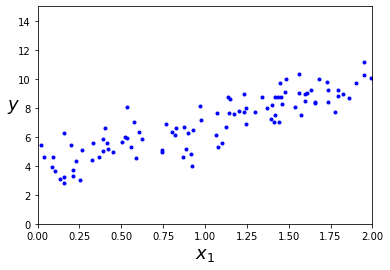

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.83300539],
       [9.94171259]])

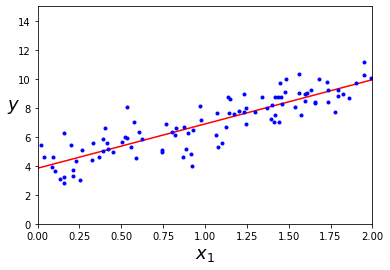

In [14]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.83300539]), array([[3.0543536]]))